In [26]:
import numpy as np 
import matplotlib.pyplot as plt 
from scattersim.particles.sphere import Sphere 
from scattersim.particles.base import PolydisperseNanoObject
from scattersim.lattices.bcc import BCC
from scattersim.utils import PeakShape, Background

In [27]:
sld_water = 9.43e-4 # convert them to nm-2
sld_Au = 119.16e-4
sld_CdTe = 41.16e-4

In [42]:
CdTe_args ={"radius" : 7.8,
            "sigma_R" : 0.9,
            "rho_ambient" : sld_water,
            "rho_object" : sld_Au
            }
CdTe = PolydisperseNanoObject(Sphere,
                              CdTe_args,
                              argname='radius',
                              argstdname='sigma_R'
                              )

AuNP_args ={"radius" : 9.1,
            "sigma_R" : 0.2,
            "rho_ambient" : sld_water,
            "rho_object" : sld_CdTe
            }
AuNP = PolydisperseNanoObject(Sphere,
                              AuNP_args,
                              argname='radius',
                              argstdname='sigma_R'
                              )

lattice_spacing = 39.0
sigma_D = 0.07 
lattice = BCC([AuNP, CdTe], 
              lattice_spacing_a=lattice_spacing, 
              sigma_D=sigma_D
              )

peak = PeakShape(delta=0.01, nu=1.0) 
background = Background(0.0, 0.0, 5.0, 0.0, 2.0)


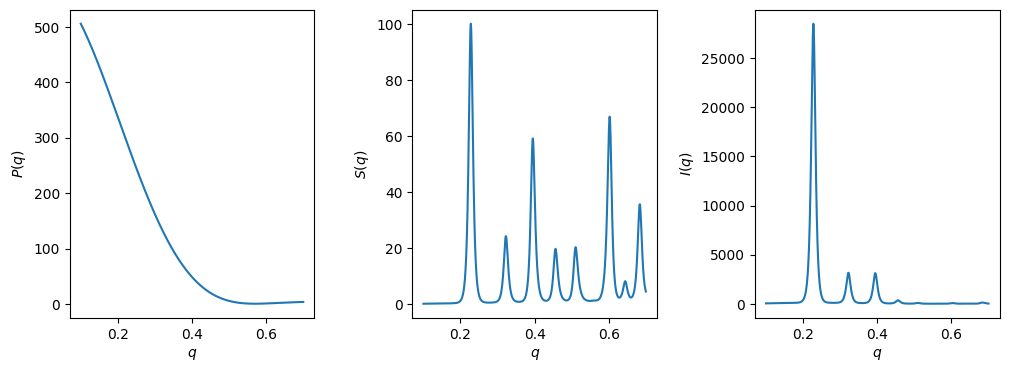

In [43]:
q = np.linspace(0.1, 0.7, 1000)
Z0 = lattice.intensity(q, peak, background=background)
Pq = lattice.form_factor_squared_isotropic(q)

c = 1e-3
Gq = lattice.G_q(q)

Sq = (c*Z0)/(Pq*Gq) + (1-Gq) # assuming beta(q) = 1
Iq = (Pq*Sq)

fig, axs = plt.subplots(1,3, figsize=(4*3, 4))
fig.subplots_adjust(wspace=0.4)
for ax in axs:
    ax.set_xlabel(r"$q$")
axs[0].plot(q, Pq)
axs[0].set_ylabel(r"$P(q)$")

axs[1].plot(q, Sq)
axs[1].set_ylabel(r"$S(q)$")

axs[2].plot(q, Iq)
axs[2].set_ylabel(r"$I(q)$")
plt.show()